In [86]:
# Set working directory
import os
os.chdir("D:/Pinelopi/Documents/Σημαντικά/Data Scientist/Project/Original Data/EEA")
os.getcwd()

#Import important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f_oneway


In [109]:
# Read csv file and display basic information
df19= pd.read_csv("df_random.csv")
df19.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154997 entries, 0 to 154996
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    154997 non-null  int64  
 1   Country               154997 non-null  object 
 2   VFN                   76845 non-null   object 
 3   Mp                    146363 non-null  object 
 4   Mh                    154997 non-null  object 
 5   Man                   154997 non-null  object 
 6   MMS                   150910 non-null  object 
 7   Tan                   154791 non-null  object 
 8   T                     154857 non-null  object 
 9   Va                    154785 non-null  object 
 10  Ve                    154780 non-null  object 
 11  Mk                    154986 non-null  object 
 12  Cn                    154939 non-null  object 
 13  Ct                    154712 non-null  object 
 14  Cr                    154997 non-null  object 
 15  

In [110]:
# Delete variables that are not usefull for the analysis, set index and check dataframe again
df19=df19.set_index('ID')

# DROP Mt , because it relates to WLTP standard, whereas m (kg) relates to NDCD standard. Renaming m (kg) into "Mass".
df19 = df19.drop(["VFN", "Mp","Man","MMS", "Tan", "T", "Va", "Ve", "Mk", "Cn", "Ct", "r",
              "Mt", "Ewltp (g/km)", "At2 (mm)", "De", "Vf", "Status", "Electric range (km)", "Date of registration", "Fuel consumption"], axis=1)

df19 = df19.rename({"Mh": "Manufacturer", "m (kg)": "Mass", "Cr": "Vehicle_Category", "W (mm)": "Wheel_Base", "At1 (mm)": "Axle_Width", "Ft": "Fuel_Type", "Fm": "Fuel_Mode", 
                "ec (cm3)": "Eng_Capacity", "ep (KW)": "Eng_Power", "z (Wh/km)": "Electric_Consum", "Enedc (g/km)": "CO2"}, axis=1)


df19.info()

df19.head()


<class 'pandas.core.frame.DataFrame'>
Index: 154997 entries, 7701815 to 951196
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Country           154997 non-null  object 
 1   Manufacturer      154997 non-null  object 
 2   Vehicle_Category  154997 non-null  object 
 3   Mass              154997 non-null  int64  
 4   CO2               154390 non-null  float64
 5   Wheel_Base        154837 non-null  float64
 6   Axle_Width        154643 non-null  float64
 7   Fuel_Type         154997 non-null  object 
 8   Fuel_Mode         154996 non-null  object 
 9   Eng_Capacity      151499 non-null  float64
 10  Eng_Power         132016 non-null  float64
 11  Electric_Consum   3133 non-null    float64
 12  IT                18918 non-null   object 
 13  Ernedc (g/km)     17924 non-null   float64
 14  Erwltp (g/km)     82 non-null      float64
 15  year              154997 non-null  int64  
dtypes: float64(8), int6

,Country,Manufacturer,Vehicle_Category,Mass,CO2,Wheel_Base,Axle_Width,Fuel_Type,Fuel_Mode,Eng_Capacity,Eng_Power,Electric_Consum,IT,Ernedc (g/km),Erwltp (g/km),year
ID,,,,,,,,,,,,,,,,
7701815,DE,AUTOMOBILES PEUGEOT,M1,1394,102.0,2730.0,1565.0,diesel,M,1499.0,96.0,NaN,NaN,NaN,NaN,2019
3387186,AT,HYUNDAI CZECH,M1,1415,105.0,2650.0,1573.0,diesel,M,1598.0,85.0,NaN,NaN,NaN,NaN,2019
5745360,DE,MAGYAR SUZUKI,M1,1195,131.0,2500.0,1535.0,petrol,M,1373.0,103.0,NaN,NaN,NaN,NaN,2019
9394578,FR,AUTOMOBILES CITROEN,M1,1165,85.0,2539.0,1483.0,diesel,M,1499.0,75.0,NaN,NaN,NaN,NaN,2019
13508686,SE,BMW AG,M1,1760,56.0,2670.0,1563.0,petrol/electric,P,1499.0,100.0,139.0,NaN,NaN,NaN,2019


In [34]:
#df19 = df19[["CO2", "Mass", "Axle_Width", "Wheel_Base", "Eng_Capacity", "Eng_Power", "Fuel_Type", "Fuel_Mode", "Vehicle_Category", "Manufacturer", "Country"]]


Vehicle_Category
M1      144819
M1        5114
M1G       4838
M1         181
M1G         39
m1           6
Name: count, dtype: int64
Vehicle_Category_new
False    150120
True       4877
Name: count, dtype: int64


In [111]:

# For Vehicle_Category
print(df19["Vehicle_Category"].value_counts()) #Display frequencies of modalities
df19['Vehicle_Category_new'] = (df19["Vehicle_Category"] == "M1G") | (df19["Vehicle_Category"] == "M1G ") #create boolean series, M1G is converted to true and everything else to False

df19['Vehicle_Category_new'] = df19['Vehicle_Category_new'].replace({False : "Passenger_cars", True : "Off_road"}) #rename the boolean values
print(df19["Vehicle_Category_new"].value_counts()) #Display frequencies of modalities

df19=df19.join(pd.get_dummies(df19.Vehicle_Category_new, prefix="Vehicle_Category").astype(int)) #create dummy variables for that


Vehicle_Category
M1      144819
M1        5114
M1G       4838
M1         181
M1G         39
m1           6
Name: count, dtype: int64
Vehicle_Category_new
Passenger_cars    150120
Off_road            4877
Name: count, dtype: int64


In [ ]:

# Remove data for electric cars in dataset
df19 = df19[df19['Fuel_Type'] != "electric"]
df19 = df19[df19['Fuel_Type'] != "hydrogen"]
df19 = df19[df19['Fuel_Type'] != "unknown"]
df19 = df19[df19['Fuel_Type'] != "Hybrid_DE"]
df19 = df19[df19['Fuel_Type'] != "Hybrid_PE"]

In [112]:

# Rename and create dummy variables
print(df19["Fuel_Type"].value_counts(normalize = True)) #Display frequencies of modalities
df19['Fuel_Type'] = df19['Fuel_Type'].replace({"petrol/electric": "Hybrid_PE", "diesel/electric": "Hybrid_DE"})


df19=df19.join(pd.get_dummies(df19.Fuel_Type, prefix="Fuel type").astype(int)) 

#df19['Electric'] = (df19["Ft"] == "electric") | (df19["Ft"] == "Hybrid_PE") | (df19["Ft"] == "Hybrid_DE") # Boolean series for electric technology or not

df19['Ft2'] = df19['Fuel_Type'].replace({"lpg": "others", "ng": "others", "ng-biomethane": "others", "hydrogen": "others", "e85": "others", "Hybrid_PE": "hybrid","Hybrid_DE": "hybrid"}) #create another fuel type variable with the least present modalities labeled as "others"

df19.head()


Fuel_Type
petrol             0.628625
diesel             0.319606
electric           0.022471
petrol/electric    0.011981
lpg                0.011542
ng                 0.003148
ng-biomethane      0.001271
diesel/electric    0.000871
e85                0.000452
hydrogen           0.000026
unknown            0.000006
Name: proportion, dtype: float64


,Country,Manufacturer,Vehicle_Category,Mass,CO2,Wheel_Base,Axle_Width,Fuel_Type,Fuel_Mode,Eng_Capacity,...,Fuel type_diesel,Fuel type_e85,Fuel type_electric,Fuel type_hydrogen,Fuel type_lpg,Fuel type_ng,Fuel type_ng-biomethane,Fuel type_petrol,Fuel type_unknown,Ft2
ID,,,,,,,,,,,,,,,,,,,,,
7701815,DE,AUTOMOBILES PEUGEOT,M1,1394,102.0,2730.0,1565.0,diesel,M,1499.0,...,1,0,0,0,0,0,0,0,0,diesel
3387186,AT,HYUNDAI CZECH,M1,1415,105.0,2650.0,1573.0,diesel,M,1598.0,...,1,0,0,0,0,0,0,0,0,diesel
5745360,DE,MAGYAR SUZUKI,M1,1195,131.0,2500.0,1535.0,petrol,M,1373.0,...,0,0,0,0,0,0,0,1,0,petrol
9394578,FR,AUTOMOBILES CITROEN,M1,1165,85.0,2539.0,1483.0,diesel,M,1499.0,...,1,0,0,0,0,0,0,0,0,diesel
13508686,SE,BMW AG,M1,1760,56.0,2670.0,1563.0,Hybrid_PE,P,1499.0,...,0,0,0,0,0,0,0,0,0,hybrid


In [67]:
#Delete values
x = df19.dropna(axis=0 , how='all' , subset=["Electric_Consum"])
display(x["Fuel_Type"].unique())
x.head()
x.info()


array(['petrol', 'diesel'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 1813993 to 11261033
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  11 non-null     object 
 1   Manufacturer             11 non-null     object 
 2   Vehicle_Category         11 non-null     object 
 3   Mass                     11 non-null     int64  
 4   CO2                      11 non-null     float64
 5   Wheel_Base               11 non-null     float64
 6   Axle_Width               11 non-null     float64
 7   Fuel_Type                11 non-null     object 
 8   Fuel_Mode                11 non-null     object 
 9   Eng_Capacity             10 non-null     float64
 10  Eng_Power                11 non-null     float64
 11  Electric_Consum          11 non-null     float64
 12  IT                       0 non-null      object 
 13  Ernedc (g/km)            0 non-null      float64
 14  Erwltp (g/km)        

In [113]:
#Delete columns with many NAs
df19=df19.drop("IT",axis=1)
df19=df19.drop("Ernedc (g/km)",axis=1)
df19=df19.drop("Erwltp (g/km)",axis=1)
df19=df19.drop("Electric_Consum",axis=1)

In [106]:
# Delete missing values
#df19 = df19[df19['Enedc (g/km)'].notna()] #only on target variable
df19=df19.dropna()
df19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128253 entries, 7701815 to 4900907
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Country                          128253 non-null  object 
 1   Manufacturer                     128253 non-null  object 
 2   Vehicle_Category                 128253 non-null  object 
 3   Mass                             128253 non-null  int64  
 4   CO2                              128253 non-null  float64
 5   Wheel_Base                       128253 non-null  float64
 6   Axle_Width                       128253 non-null  float64
 7   Fuel_Type                        128253 non-null  object 
 8   Fuel_Mode                        128253 non-null  object 
 9   Eng_Capacity                     128253 non-null  float64
 10  Eng_Power                        128253 non-null  float64
 11  year                             128253 non-null  int64  
 12  

In [114]:
#Create datasets with numerical variables
var_num = df19.select_dtypes(include = ['int', 'float']) 
var_num=var_num.drop("year",axis=1)

var_num.info()


<class 'pandas.core.frame.DataFrame'>
Index: 154997 entries, 7701815 to 951196
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Mass                             154997 non-null  int64  
 1   CO2                              154390 non-null  float64
 2   Wheel_Base                       154837 non-null  float64
 3   Axle_Width                       154643 non-null  float64
 4   Eng_Capacity                     151499 non-null  float64
 5   Eng_Power                        132016 non-null  float64
 6   Vehicle_Category_Off_road        154997 non-null  int32  
 7   Vehicle_Category_Passenger_cars  154997 non-null  int32  
 8   Fuel type_Hybrid_DE              154997 non-null  int32  
 9   Fuel type_Hybrid_PE              154997 non-null  int32  
 10  Fuel type_diesel                 154997 non-null  int32  
 11  Fuel type_e85                    154997 non-null  int32  
 12  F

In [62]:
df19 = df19[df19['Fuel_Type'] != "Hybrid_DE"]
df19 = df19[df19['Fuel_Type'] != "Hybrid_PE"]

Mass
CO2
Wheel_Base
Axle_Width
Eng_Capacity
Eng_Power


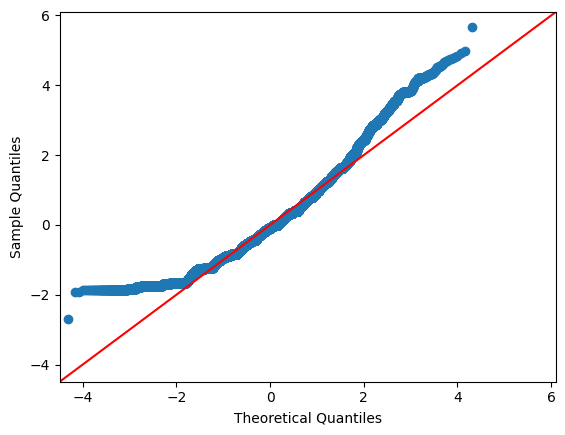

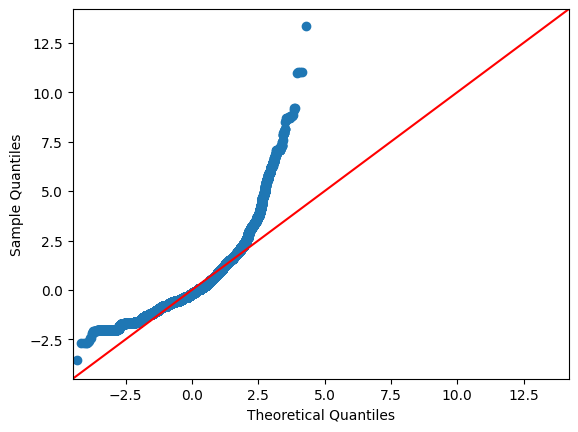

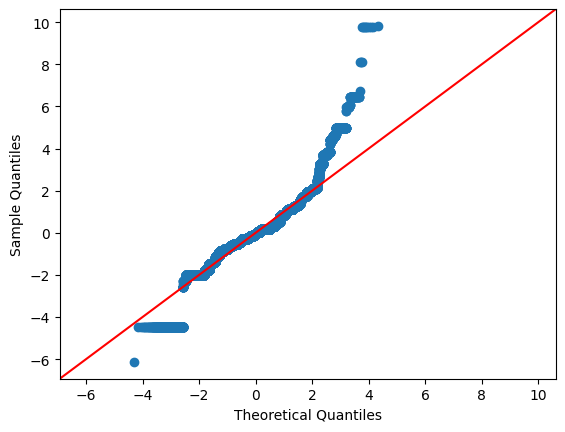

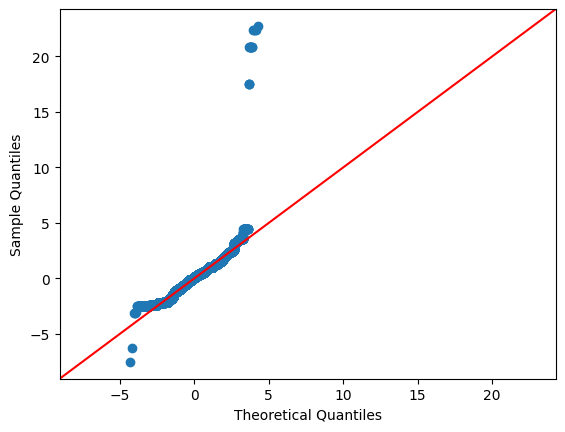

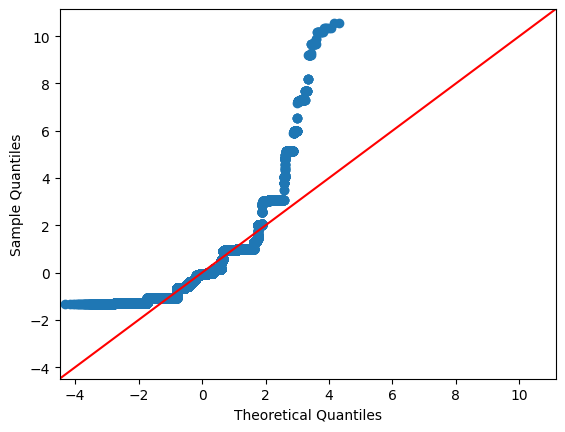

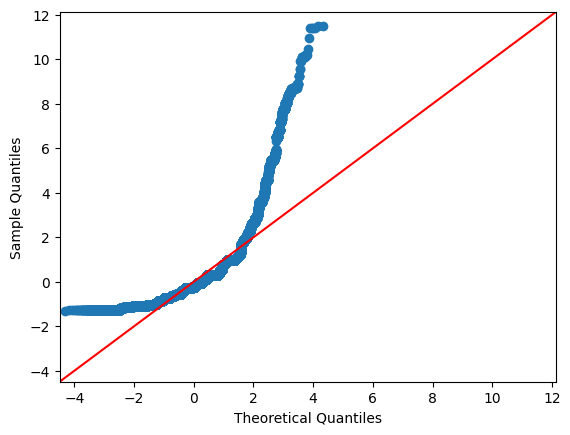

In [71]:
# Check normality
selected_columns = ["Mass", "CO2", "Wheel_Base", "Axle_Width", "Eng_Capacity", "Eng_Power"]
var_num_normality = var_num[selected_columns]

for column in var_num_normality:
  print(column)
  sm.qqplot(var_num_normality[column], line='45', fit = True) 

<Axes: >

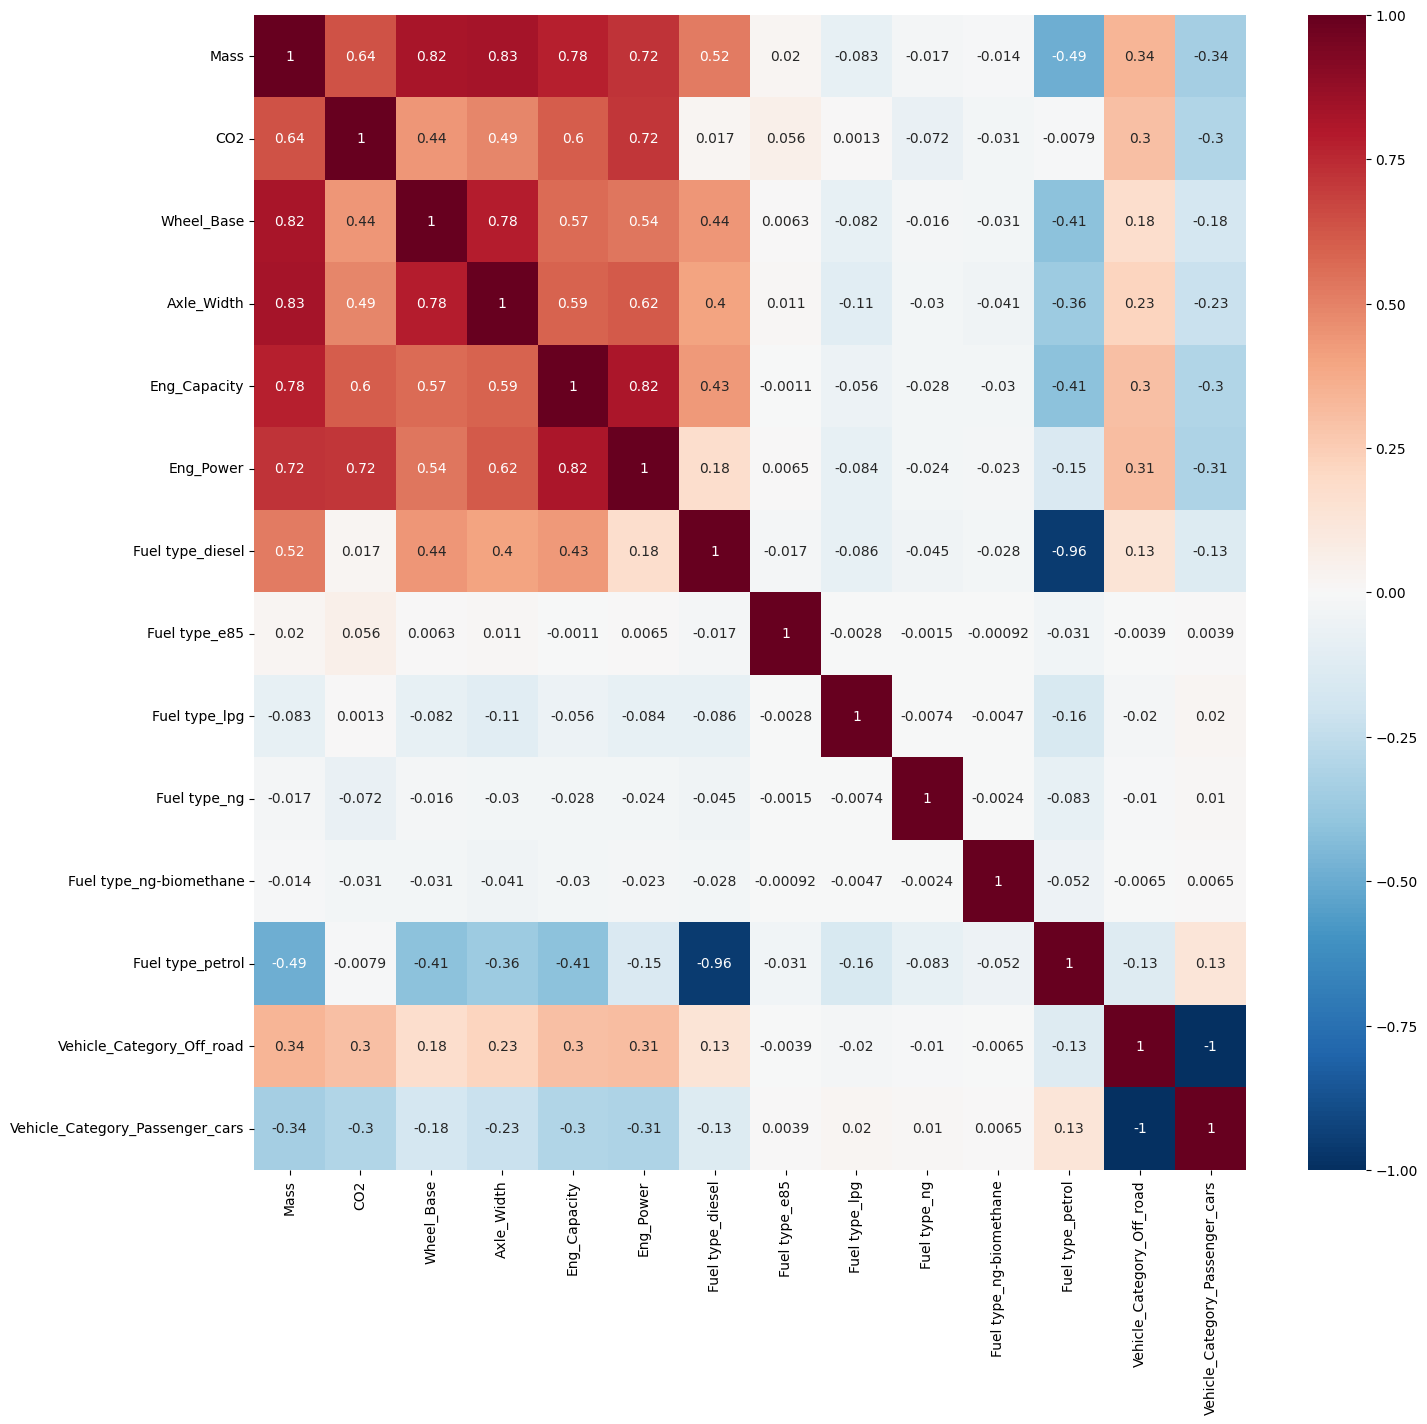

In [75]:
#Heatmap for correlation
plt.figure(figsize=(16,15))
sns.heatmap(var_num.corr(), annot=True, cmap="RdBu_r", center =0)

C:\Users\Pinelopi\AppData\Local\Temp\ipykernel_15620\2615337027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot( x="Fuel_Type", y="Mass", kind="box", data=df19, palette="Set2",order=order, legend=False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'e85'),
  Text(1, 0, 'diesel'),
  Text(2, 0, 'lpg'),
  Text(3, 0, 'petrol'),
  Text(4, 0, 'ng-biomethane'),
  Text(5, 0, 'ng'),
  Text(6, 0, 'Hybrid_PE'),
  Text(7, 0, 'Hybrid_DE'),
  Text(8, 0, 'electric'),
  Text(9, 0, 'unknown')])

<Figure size 1000x1000 with 0 Axes>

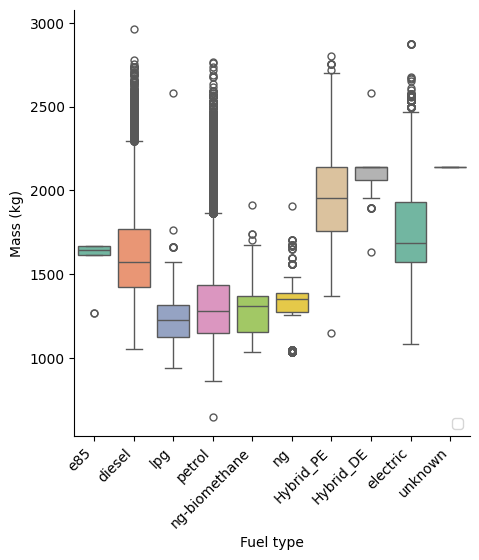

In [130]:
# To mass of cars per fuel type
order=["e85","diesel","lpg","petrol","ng-biomethane","ng","Hybrid_PE","Hybrid_DE", "electric","unknown"]

plt.figure(figsize= (10,10))
sns.catplot( x="Fuel_Type", y="Mass", kind="box", data=df19, palette="Set2",order=order, legend=False)
plt.legend(loc='lower right')
plt.xlabel('Fuel type')
plt.ylabel('Mass (kg)')
plt.xticks(rotation=45, ha="right")


Country
DE    33498
FR    22694
IT    19066
ES    13294
PL     5314
BE     5126
NL     3366
AT     3299
SE     3147
CZ     2513
PT     2156
DK     2070
RO     1630
HU     1433
IE     1142
GR     1126
FI     1026
SK      933
SI      691
NO      617
HR      593
LU      538
LT      449
BG      283
EE      262
LV      170
CY      115
IS       88
MT       66
Name: count, dtype: int64


Text(0, 0.5, 'Fuel type')

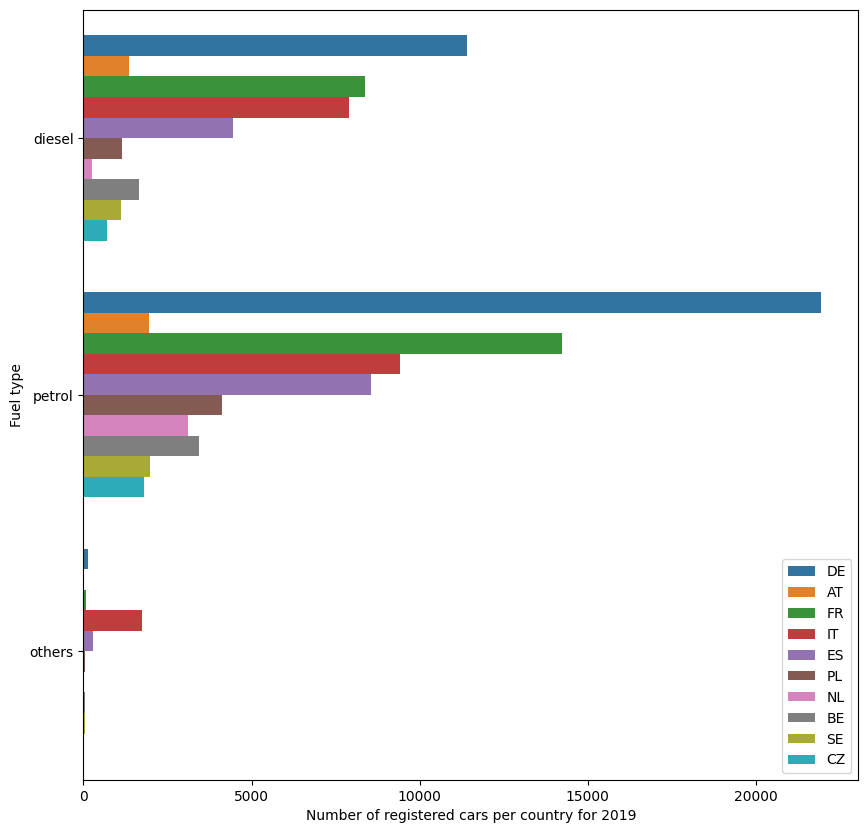

In [79]:
#To visualize number of cars per country and fuel type:
print(df19["Country"].value_counts()) #Display frequencies of modalities
value_counts_C = df19["Country"].value_counts()
most_frequent_C = value_counts_C.nlargest(10).index
for_graph_C = df19[df19["Country"].isin(most_frequent_C)]


plt.figure(figsize= (10,10))
sns.countplot(y="Ft2", hue= "Country", data=for_graph_C)
plt.legend(loc='lower right')
plt.xlabel('Number of registered cars per country for 2019')
plt.ylabel('Fuel type')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Series([], Name: count, dtype: int64)


Text(0.5, 1.0, 'CO2 emissions of hybrid cars per manufacturer')

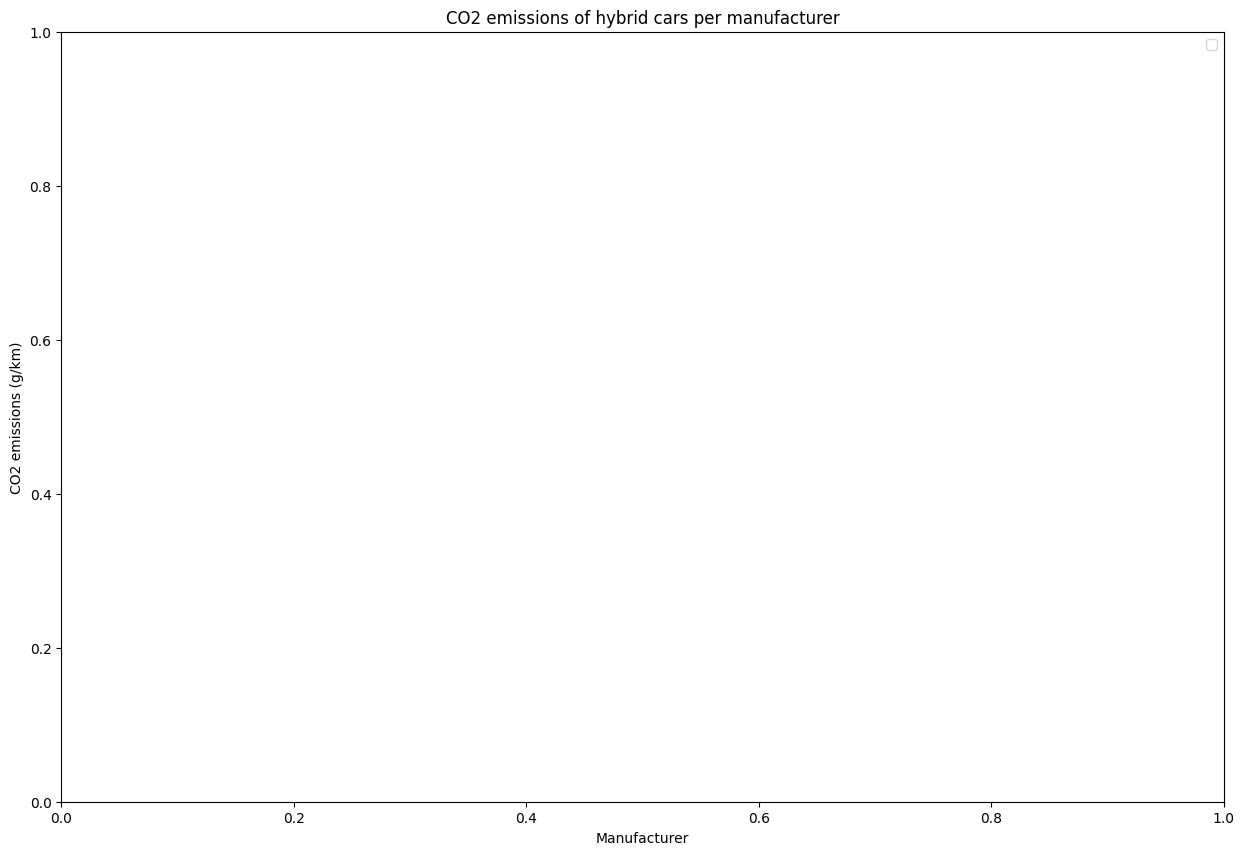

In [82]:
# To check emmisions for the 15 most present manufacturers for hybrid cars
df19['Manufacturer'] = df19['Manufacturer'].replace({"VOLKSWAGEN": "VWG", "VOLKSWAGEN VW": "VWG-VW", "MERCEDES-BENZ": "MBZ"}) #rename so it fits better in plot

#Select hybrid cars

df19_plot_hybrid=df19[(df19["Fuel_Type"] == "Hybrid_PE") | (df19["Fuel_Type"] == "Hybrid_DE")]

#Select the 15 most present manufacturers
print(df19_plot_hybrid["Manufacturer"].value_counts()) #Display frequencies of modalities
value_counts = df19_plot_hybrid["Manufacturer"].value_counts()
most_frequent_Mk = value_counts.nlargest(15).index
for_graph_Mk = df19_plot_hybrid[df19_plot_hybrid["Manufacturer"].isin(most_frequent_Mk)]

#Plot
plt.figure(figsize= (15,10))
sns.barplot(x="Manufacturer", y="CO2", hue= "Fuel_Type", data=for_graph_Mk)
#plt.xlim(0, 5500)
plt.legend(loc='upper right')
plt.xlabel('Manufacturer')
plt.ylabel('CO2 emissions (g/km)')
plt.title("CO2 emissions of hybrid cars per manufacturer")


Manufacturer
VWG                    14809
RENAULT                11587
AUTOMOBILES PEUGEOT     8255
DAIMLER AG              7625
FORD WERKE GMBH         6995
                       ...  
LOTUS                      3
DFSK                       3
DONKERVOORT                1
CATERHAM                   1
ADIDOR                     1
Name: count, Length: 70, dtype: int64


Text(0.5, 1.0, 'CO2 emissions of fossil fuel cars per manufacturer')

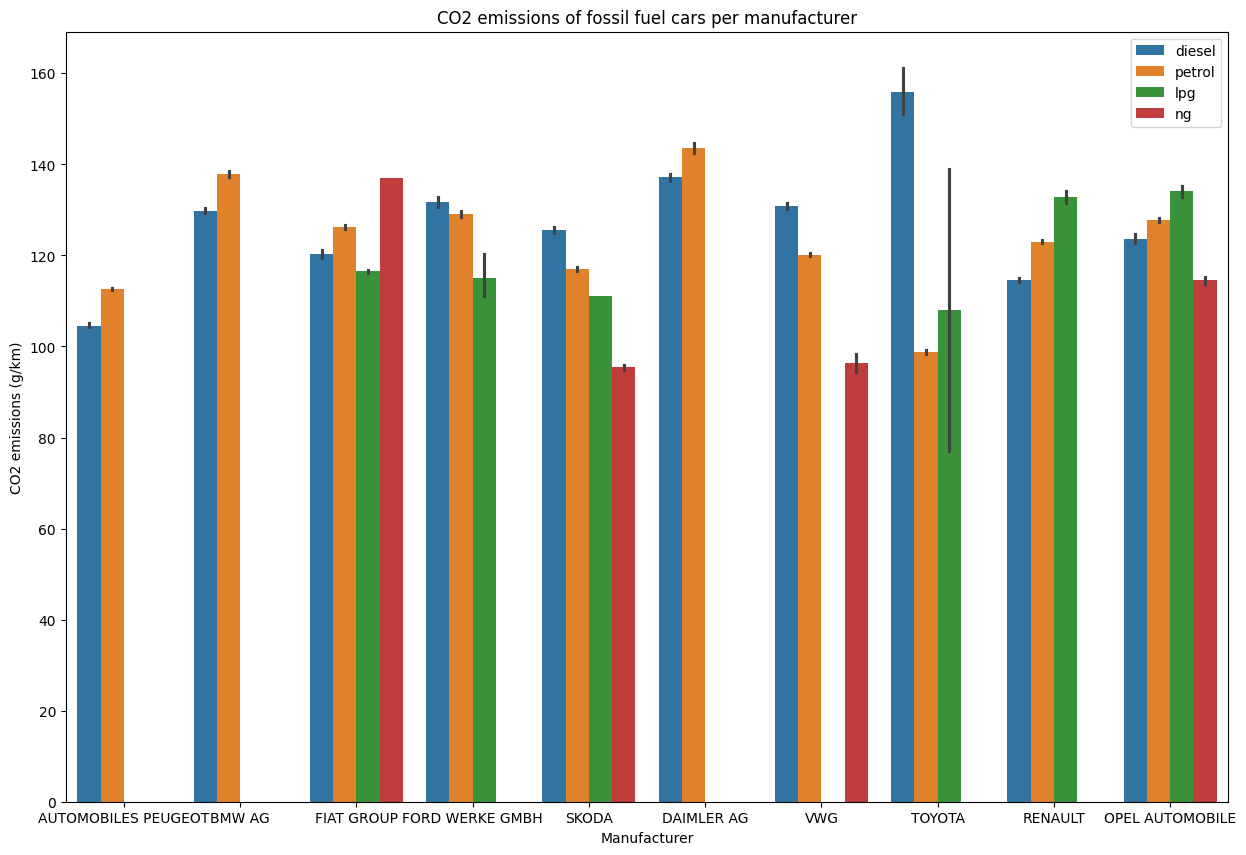

In [83]:
# To check emmisions for the 15 most present manufacturers for non electric cars
#Select non-electric cars and most present fuel types

df19_plot_fossil=df19[(df19["Fuel_Type"] == "diesel") | (df19["Fuel_Type"] == "petrol") |(df19["Fuel_Type"] == "lpg") | (df19["Fuel_Type"] == "ng")]


#Select the 10 most present manufacturers
print(df19_plot_fossil["Manufacturer"].value_counts()) #Display frequencies of modalities

value_counts = df19_plot_fossil["Manufacturer"].value_counts()
most_frequent_Mk = value_counts.nlargest(10).index
for_graph_Mk = df19_plot_fossil[df19_plot_fossil["Manufacturer"].isin(most_frequent_Mk)]

for_graph_Mk.head()
#Plot
plt.figure(figsize= (15,10))
sns.barplot(x="Manufacturer", y="CO2", hue= "Fuel_Type", data=for_graph_Mk)
#plt.xlim(0, 5500)
plt.legend(loc='upper right')
plt.xlabel('Manufacturer')
plt.ylabel('CO2 emissions (g/km)')
plt.title("CO2 emissions of fossil fuel cars per manufacturer")

,Country,Manufacturer,Vehicle_Category,Mass,CO2,Wheel_Base,Axle_Width,Fuel_Type,Fuel_Mode,Eng_Capacity,...,Fuel type_diesel,Fuel type_e85,Fuel type_lpg,Fuel type_ng,Fuel type_ng-biomethane,Fuel type_petrol,Ft2,Vehicle_Category_new,Vehicle_Category_Off_road,Vehicle_Category_Passenger_cars
ID,,,,,,,,,,,,,,,,,,,,,
7701815,DE,AUTOMOBILES PEUGEOT,M1,1394,102.0,2730.0,1565.0,diesel,M,1499.0,...,1,0,0,0,0,0,diesel,Passenger_cars,0,1
9838718,FR,BMW AG,M1,1615,180.0,2690.0,1535.0,petrol,M,2998.0,...,0,0,0,0,0,1,petrol,Passenger_cars,0,1
15086596,ES,AUTOMOBILES PEUGEOT,M1,1050,110.0,2538.0,1470.0,petrol,M,1199.0,...,0,0,0,0,0,1,petrol,Passenger_cars,0,1
10653785,PL,FORD WERKE GMBH,M1,1615,177.0,2690.0,1569.0,petrol,M,1498.0,...,0,0,0,0,0,1,petrol,Passenger_cars,0,1
11704451,NL,SKODA,M1,1361,121.0,2620.0,1570.0,petrol,M,999.0,...,0,0,0,0,0,1,petrol,Passenger_cars,0,1


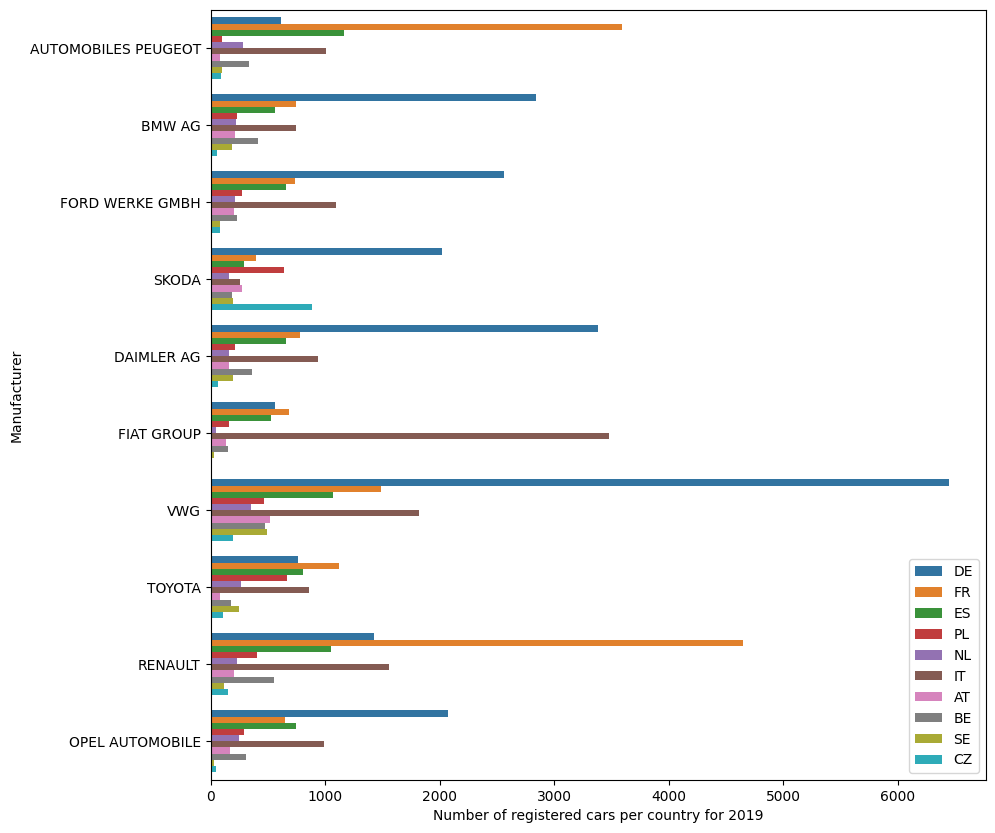

In [84]:
# To check number of cars per country per manufacturer
value_counts_MC = df19["Country"].value_counts()
most_frequent_MC = value_counts_MC.nlargest(10).index
for_graph_MC = df19[df19["Country"].isin(most_frequent_MC)]

value_counts_Mk = for_graph_MC["Manufacturer"].value_counts()
most_frequent_Mk= value_counts_Mk.nlargest(10).index
for_graph_Mk = for_graph_MC[for_graph_MC["Manufacturer"].isin(most_frequent_Mk)]

plt.figure(figsize= (10,10))
sns.countplot(y="Manufacturer", hue= "Country", data=for_graph_Mk)
#plt.xlim(0, 5500)
plt.legend(loc='lower right')
plt.xlabel('Number of registered cars per country for 2019')
plt.ylabel('Manufacturer')
for_graph_Mk.head()


C:\Users\Pinelopi\AppData\Local\Temp\ipykernel_15620\3934036406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot( x="Fuel_Type", y="CO2", kind="bar", data=df19, palette="Set2", legend=False, order=order)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'e85'),
  Text(1, 0, 'diesel'),
  Text(2, 0, 'lpg'),
  Text(3, 0, 'petrol'),
  Text(4, 0, 'ng-biomethane'),
  Text(5, 0, 'ng'),
  Text(6, 0, 'Hybrid_PE'),
  Text(7, 0, 'Hybrid_DE'),
  Text(8, 0, 'electric'),
  Text(9, 0, 'unknown')])

<Figure size 1500x1500 with 0 Axes>

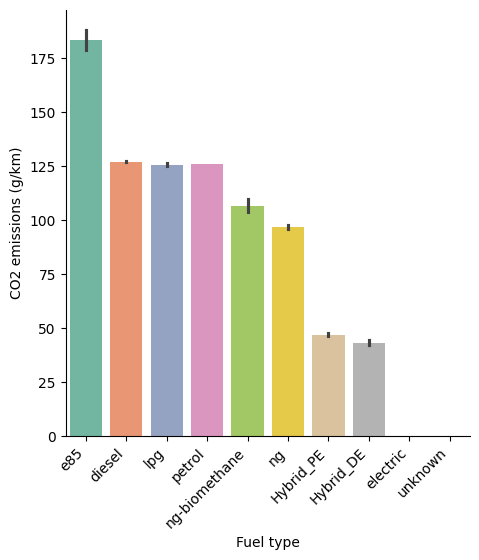

In [124]:
# CO2 emissions of fuel type
order=["e85","diesel","lpg","petrol","ng-biomethane","ng","Hybrid_PE","Hybrid_DE", "electric","unknown"]

plt.figure(figsize= (15,15))
sns.catplot( x="Fuel_Type", y="CO2", kind="bar", data=df19, palette="Set2", legend=False, order=order)
#plt.legend(loc='lower right')
plt.xlabel('Fuel type')
plt.ylabel('CO2 emissions (g/km)')
plt.xticks(rotation=45, ha="right")

In [ ]:
from statsmodels.formula.api import ols
# Assuming you have a DataFrame named 'df' with columns 'values' and 'groups'
model = ols('Enedc (g/km) ~ C(Mk)', data=df19).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Fit the two-way ANOVA model
model = ols('Enedc (g/km) ~ C(Mk) * C(Ft)', data=df19_random_no_e).fit()

# Create an ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)


In [129]:
#one way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('CO2 ~ C(Fuel_Type)', data=df19).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)


                    sum_sq        df             F  PR(>F)
C(Fuel_Type)  7.356799e+07      10.0  12043.524858     0.0
Residual      9.430318e+07  154380.0           NaN     NaN


c:\Users\Pinelopi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  warnings.warn('covariance of constraints does not have full '


In [128]:
#Tukey Honestly Significant Difference (HSD)
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df19['CO2'], df19['Fuel_Type'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Hybrid_DE,Hybrid_PE,nan,nan,nan,nan,False
Hybrid_DE,diesel,nan,nan,nan,nan,False
Hybrid_DE,e85,nan,nan,nan,nan,False
Hybrid_DE,electric,nan,nan,nan,nan,False
Hybrid_DE,hydrogen,nan,nan,nan,nan,False
Hybrid_DE,lpg,nan,nan,nan,nan,False
Hybrid_DE,ng,nan,nan,nan,nan,False
Hybrid_DE,ng-biomethane,nan,nan,nan,nan,False
Hybrid_DE,petrol,nan,nan,nan,nan,False
Hybrid_DE,unknown,nan,nan,nan,nan,False
